In [20]:
import yfinance as yf
import pandas as pd

In [21]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import string

letters = string.ascii_uppercase
exchg = ['NYSE', 'NASDAQ']
tickers = []
for letter in letters:
    res = requests.get("http://eoddata.com/stocklist/NYSE/%s.htm" % letter)
    soup = BeautifulSoup(res.content,"html.parser")
    table = soup.find_all('table')[5] 
    tickers = tickers + pd.read_html(str(table))[0]['Code'].to_list()

In [3]:
tsla_df = yf.download('TSLA', 
                      start='2016-01-01', 
                      end='2019-07-24', 
                      progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,230.720001,231.380005,219.000000,223.410004,223.410004,6827100
2016-01-05,226.360001,226.889999,220.000000,223.429993,223.429993,3186800
2016-01-06,220.000000,220.050003,215.979996,219.039993,219.039993,3779100
2016-01-07,214.190002,218.440002,213.669998,215.649994,215.649994,3554300
2016-01-08,217.860001,220.440002,210.770004,211.000000,211.000000,3628100


In [71]:
tickers_set = list(set([x.split('.')[0].split('-')[0] for x in tickers]))

In [140]:
list(set([x.split('.')[0].split('-')[0] for x in ['AAPL-G', 'TSLA.W']]))

['TSLA', 'AAPL']

In [67]:
len(tickers_set)

2612

In [33]:
tickers[10]

'ABG'

In [262]:
tickers_set

['PCN',
 'GAB',
 'PCQ',
 'SFE',
 'FLOW',
 'VLT',
 'ICE',
 'IGI',
 'CB',
 'MED',
 'NTG',
 'BFS',
 'GMR',
 'GPC',
 'IPOC',
 'INSP',
 'MEC',
 'DG',
 'KOP',
 'TXT',
 'VPG',
 'ESE',
 'PAC',
 'RCB',
 'ALEX',
 'CEL',
 'NMT',
 'VEEV',
 'GNK',
 'KRG',
 'MMT',
 'EZT',
 'GRAF',
 'BDX',
 'DRUA',
 'TNP',
 'ALC',
 'JWN',
 'ORA',
 'CFG',
 'NJV',
 'CBU',
 'EV',
 'BLL',
 'SRC',
 'THGA',
 'MAIN',
 'RRD',
 'MBI',
 'THW',
 'DTJ',
 'ORN',
 'NGVC',
 'PIPR',
 'RF',
 'AAT',
 'PST',
 'TEX',
 'BNED',
 'ECT',
 'RHP',
 'ECL',
 'SOLN',
 'TBC',
 'DDF',
 'IQV',
 'ETP',
 'IHC',
 'SCHW',
 'CHL',
 'BLW',
 'ATKR',
 'AVY',
 'FMY',
 'ADCT',
 'THQ',
 'DYFN',
 'PAA',
 'TCP',
 'AXS',
 'AVAL',
 'DSX',
 'AFI',
 'FEDU',
 'MTR',
 'GMED',
 'SMP',
 'BBU',
 'GLW',
 'CLB',
 'CDE',
 'MCK',
 'ONTO',
 'TRQ',
 'DOC',
 'PGTI',
 'WAT',
 'WCC',
 'AEE',
 'IPG',
 'CVEO',
 'SQ',
 'FRT',
 'OSB',
 'IHIT',
 'HBM',
 'CVA',
 'FOUR',
 'SBS',
 'PMF',
 'FCX',
 'MQY',
 'EMO',
 'CACI',
 'NUE',
 'RTW',
 'BH',
 'AFGC',
 'TDY',
 'DLY',
 'JNPR',
 'PLT',
 '

In [346]:

ticker = yf.Tickers(ticks)

data = ticker.history(period='1mo',interval='15m' )

[*********************100%***********************]  1499 of 1499 completed

6 Failed downloads:
- DNI: No data found for this date range, symbol may be delisted
- IPO: No data found for this date range, symbol may be delisted
- SSD: No data found for this date range, symbol may be delisted
- OC: No data found for this date range, symbol may be delisted
- PDI: No data found for this date range, symbol may be delisted
- PVG: No data found for this date range, symbol may be delisted


In [299]:
index = data.columns


In [302]:
index.droplevel(1)

Index(['Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close',
       'Close', 'Close',
       ...
       'Volume', 'Volume', 'Volume', 'Volume', 'Volume', 'Volume', 'Volume',
       'Volume', 'Volume', 'Volume'],
      dtype='object', length=10493)

In [274]:
data.loc[('Close', 'AAP')]

KeyError: 'Close'

In [343]:
dataDict = {}
for t in ticks:
    x = data.loc[:, (slice(None), t)].copy()
    x.columns = x.columns.droplevel(1)
    x['delta'] = x['Close'].diff()/x['Close']
    x['spread'] = 1-(x['Low']/x['High'])
    x['NormVol'] = (x['Volume']-x['Volume'].min())/(x['Volume'].max()-x['Volume'].min())
    
    dataDict[t] = x.fillna(0)
    

In [344]:
dataDict['AAP']

,Close,Dividends,High,Low,Open,Stock Splits,Volume,delta,spread,NormVol
Date,,,,,,,,,,
2015-07-24,165.987869,0.0,167.713725,165.484911,166.333046,0,529500,0.000000,0.013289,0.012135
2015-07-27,166.017426,0.0,166.845833,164.202815,165.218603,0,586400,0.000178,0.015841,0.015060
2015-07-28,167.950455,0.0,168.384387,165.376463,166.747285,0,411100,0.011510,0.017863,0.006050
2015-07-29,170.672348,0.0,171.214763,167.536229,168.295594,0,838000,0.015948,0.021485,0.027991
2015-07-30,170.159515,0.0,171.283787,168.552014,170.593447,0,509700,-0.003014,0.015949,0.011117
...,...,...,...,...,...,...,...,...,...,...
2020-07-20,144.899994,0.0,145.660004,142.970001,145.199997,0,417700,0.000276,0.018468,0.006389
2020-07-21,147.380005,0.0,148.080002,145.029999,145.380005,0,756100,0.016827,0.020597,0.023782
2020-07-22,149.399994,0.0,150.070007,146.899994,146.899994,0,493800,0.013521,0.021124,0.010300


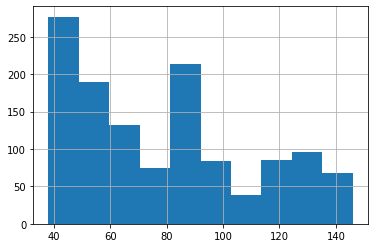

In [320]:
x['Close'].hist()


In [333]:
x['delta'] = x['Close'].diff()/x['Close']

In [337]:
x['delta'].describe()

count    1259.000000
mean        0.000736
std         0.016455
min        -0.172272
25%        -0.006282
50%         0.001076
75%         0.008428
max         0.106978
Name: delta, dtype: float64

In [288]:
data.xs('Close', level='second', axis=1)

KeyError: 'Level second not found'

In [265]:
low['AAP']

Date
2015-07-27    164.202815
2015-07-28    165.376463
2015-07-29    167.536229
2015-07-30    168.552014
2015-07-31    169.686097
                 ...    
2020-07-20    142.970001
2020-07-21    145.029999
2020-07-22    146.899994
2020-07-23    146.979996
2020-07-24           NaN
Name: AAP, Length: 1259, dtype: float64

In [73]:
low = ticker.history(period='5y')['Low']
high = ticker.history(period='5y')['High']
open_x = ticker.history(period='5y')['Open']
close = ticker.history(period='5y')['Close']
vol = ticker.history(period='5y')['Volume']

[*********************100%***********************]  2612 of 2612 completed

353 Failed downloads:
- CB: No data found, symbol may be delisted
- GMR: No data found for this date range, symbol may be delisted
- IPOC: No data found, symbol may be delisted
- INSP: No data found, symbol may be delisted
- DG: No data found, symbol may be delisted
- TXT: No data found, symbol may be delisted
- VPG: No data found, symbol may be delisted
- PAC: No data found, symbol may be delisted
- CEL: No data found, symbol may be delisted
- BDX: No data found, symbol may be delisted
- RRD: No data found, symbol may be delisted
- ORN: No data found, symbol may be delisted
- PIPR: No data found, symbol may be delisted
- TBC: No data found, symbol may be delisted
- SOLN: No data found, symbol may be delisted
- FMY: No data found, symbol may be delisted
- ADCT: No data found, symbol may be delisted
- TCP: No data found, symbol may be delisted
- AFI: No data found, symbol may be delisted
- AEE: No data found, sy

[*********************100%***********************]  2612 of 2612 completed

353 Failed downloads:
- CB: No data found, symbol may be delisted
- GMR: No data found for this date range, symbol may be delisted
- IPOC: No data found, symbol may be delisted
- INSP: No data found, symbol may be delisted
- DG: No data found, symbol may be delisted
- TXT: No data found, symbol may be delisted
- VPG: No data found, symbol may be delisted
- PAC: No data found, symbol may be delisted
- CEL: No data found, symbol may be delisted
- BDX: No data found, symbol may be delisted
- RRD: No data found, symbol may be delisted
- ORN: No data found, symbol may be delisted
- PIPR: No data found, symbol may be delisted
- SOLN: No data found, symbol may be delisted
- TBC: No data found, symbol may be delisted
- ADCT: No data found, symbol may be delisted
- FMY: No data found, symbol may be delisted
- TCP: No data found, symbol may be delisted
- AFI: No data found, symbol may be delisted
- AEE: No data found, sy

[*********************100%***********************]  2612 of 2612 completed

353 Failed downloads:
- CB: No data found, symbol may be delisted
- GMR: No data found for this date range, symbol may be delisted
- IPOC: No data found, symbol may be delisted
- INSP: No data found, symbol may be delisted
- DG: No data found, symbol may be delisted
- TXT: No data found, symbol may be delisted
- VPG: No data found, symbol may be delisted
- PAC: No data found, symbol may be delisted
- CEL: No data found, symbol may be delisted
- BDX: No data found, symbol may be delisted
- RRD: No data found, symbol may be delisted
- ORN: No data found, symbol may be delisted
- PIPR: No data found, symbol may be delisted
- SOLN: No data found, symbol may be delisted
- TBC: No data found, symbol may be delisted
- FMY: No data found, symbol may be delisted
- ADCT: No data found, symbol may be delisted
- TCP: No data found, symbol may be delisted
- AFI: No data found, symbol may be delisted
- AEE: No data found, sy

[*********************100%***********************]  2612 of 2612 completed

353 Failed downloads:
- GMR: No data found for this date range, symbol may be delisted
- IPOC: No data found, symbol may be delisted
- INSP: No data found, symbol may be delisted
- DG: No data found, symbol may be delisted
- TXT: No data found, symbol may be delisted
- VPG: No data found, symbol may be delisted
- PAC: No data found, symbol may be delisted
- CEL: No data found, symbol may be delisted
- BDX: No data found, symbol may be delisted
- RRD: No data found, symbol may be delisted
- ORN: No data found, symbol may be delisted
- PIPR: No data found, symbol may be delisted
- SOLN: No data found, symbol may be delisted
- TBC: No data found, symbol may be delisted
- FMY: No data found, symbol may be delisted
- ADCT: No data found, symbol may be delisted
- TCP: No data found, symbol may be delisted
- AFI: No data found, symbol may be delisted
- AEE: No data found, symbol may be delisted
- IHIT: No data found, 

[*********************100%***********************]  2612 of 2612 completed

353 Failed downloads:
- GMR: No data found for this date range, symbol may be delisted
- IPOC: No data found, symbol may be delisted
- INSP: No data found, symbol may be delisted
- DG: No data found, symbol may be delisted
- TXT: No data found, symbol may be delisted
- VPG: No data found, symbol may be delisted
- PAC: No data found, symbol may be delisted
- CEL: No data found, symbol may be delisted
- BDX: No data found, symbol may be delisted
- RRD: No data found, symbol may be delisted
- PIPR: No data found, symbol may be delisted
- ORN: No data found, symbol may be delisted
- SOLN: No data found, symbol may be delisted
- TBC: No data found, symbol may be delisted
- FMY: No data found, symbol may be delisted
- ADCT: No data found, symbol may be delisted
- TCP: No data found, symbol may be delisted
- AFI: No data found, symbol may be delisted
- AEE: No data found, symbol may be delisted
- IHIT: No data found, 

In [258]:
open_filt = open_x.loc[:,close.count()==1258]
close_filt = close.loc[:,close.count()==1258]
high_filt = high.loc[:,close.count()==1258]
low_filt = low.loc[:,close.count()==1258]
vol_filt = vol.loc[:,close.count()==1258]

In [267]:
ticks = vol_filt.columns.tolist()

In [266]:
dataDict = {}
for c in vol_filt.columns:
    open_filt[c].dropna()
    close_filt
    high_filt
    low_filt
    vol_filt

SyntaxError: unexpected EOF while parsing (<ipython-input-266-13f32811879c>, line 3)

In [111]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

Using plaidml.keras.backend backend.


from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)
 
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [113]:
import pandas as pd
from sklearn import preprocessing

x = delta.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
sdelta = pd.DataFrame(x_scaled, index= delta.index, columns=delta.columns)

In [142]:
sdelta.dropna(inplace=True)

In [242]:
import numpy as np
def createSupervised(df, n_in=1, n_out=1):
    X = []
    Y = []
    X_t = []
    Y_t = []
    if len(df)>= n_in+n_out:
        times = df.index.tolist()
        features = df.columns.tolist()
        for f in features:
            print(f)
            values = df[f].values
            for i in range(n_in+n_out, values.shape[0]-(n_in+n_out+1)):
                x = values[i:i+n_in+n_out]
                y = x[-n_out]
                x = x[:-n_out]
                x_times = times[i:i+n_in+n_out]
                y_times = x_times[-n_out]
                x_times = x_times[:-n_out]
                X.append(x)
                Y.append(y)
                X_t.append(x_times)
                Y_t.append(y_times)
            
    return np.array(X), np.array(Y), X_t,Y_t, features
            
            
            

In [243]:
n_lookback = 30
n_forecast = 1
X, Y, X_t,Y_t, features = createSupervised(sdelta, n_lookback,n_forecast)

AAN
AAP
AAT
AB
ABB
ABBV
ABC
ABEV
ABG
ABM
ABR
ABT
ACCO
ACH
ACM
ACN
ACRE
ADC
ADM
ADS
ADX
AEB
AEG
AEM
AEO
AEP
AES
AFB
AFC
AFG
AFL
AFT
AG
AGCO
AGD
AGI
AGM
AGRO
AGX
AHC
AHH
AHT
AI
AIR
AIT
AIV
AIZ
AJG
AJRD
AJX
AL
ALB
ALE
ALEX
ALG
ALK
ALL
ALLE
ALSN
ALX
AM
AMBC
AMC
AME
AMG
AMH
AMN
AMOV
AMRC
AMT
AMX
AN
ANET
ANF
ANH
ANTM
AON
AOS
AP
APAM
APD
APH
APLE
APO
APTS
APTV
ARC
ARCO
ARDC
ARE
ARGD
ARGO
ARI
ARMK
AROC
ARR
ARW
ASA
ASC
ASG
ASGN
ASH
ASPN
ATEN
ATHM
ATI
ATO
ATR
ATTO
AVA
AVAL
AVB
AVNS
AVNT
AVT
AVY
AWF
AWI
AWK
AWP
AWR
AXP
AXS
AXTA
AZN
AZO
AZZ
B
BA
BABA
BAC
BAH
BAM
BAP
BAX
BB
BBAR
BBD
BBDC
BBF
BBK
BBN
BBVA
BBW
BBY
BC
BCE
BCEI
BCH
BCO
BCX
BDC
BDJ
BDN
BEN
BEP
BERY
BFAM
BFK
BFS
BFY
BFZ
BG
BGG
BGH
BGS
BGT
BGX
BHC
BHE
BHK
BHLB
BHP
BHR
BIF
BIP
BITA
BK
BKD
BKE
BKH
BKI
BKK
BKN
BKR
BKT
BLD
BLE
BLL
BLX
BMA
BME
BMI
BMO
BMY
BNS
BNY
BOE
BOOT
BP
BPT
BRC
BRFS
BRO
BSBR
BSD
BSE
BSIG
BSL
BSMX
BST
BSX
BTA
BTI
BTO
BTT
BTZ
BUD
BURL
BVN
BW
BWA
BWG
BWXT
BX
BXC
BXMT
BXP
BXS
BYD
BYM
C
CABO
CACI
CAE
CAF
CAG
CAH
CAI
CAJ
CAL
CA

In [246]:
X = X.reshape(X.shape[0], X.shape[1],1)

In [249]:
Y = Y.reshape(Y.shape[0],1)

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [245]:
# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [255]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_test.shape[2])))
model.add(Dense(y_train.shape[1]))
model.compile(loss='mse', optimizer='adam')

In [256]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [257]:
history = model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split=0.2, shuffle=False)

Train on 1074782 samples, validate on 268696 samples
Epoch 1/10
1074782/1074782 [==============================] - 93s 87us/step - loss: 0.0063 - val_loss: 0.0049
Epoch 2/10
1074782/1074782 [==============================] - 84s 78us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 3/10
1074782/1074782 [==============================] - 84s 79us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 4/10
1074782/1074782 [==============================] - 85s 79us/step - loss: 0.0047 - val_loss: 0.0049
Epoch 5/10
 587000/1074782 [===============>..............] - ETA: 36s - loss: 0.0047

KeyboardInterrupt: 

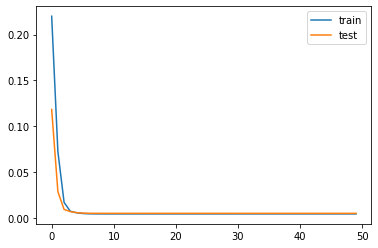

In [227]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [191]:
Y.shape

(1207, 5, 1499)

In [175]:
data

{'x': array([[0.46968103, 0.19401194, 0.30406733, ..., 0.22911788, 0.29734741,
         0.53608161],
        [0.56190854, 0.47315339, 0.39327092, ..., 0.4146415 , 0.28573744,
         0.54229398],
        [0.59666017, 0.56761746, 0.41623389, ..., 0.53454061, 0.3441125 ,
         0.68378871],
        ...,
        [0.57665407, 0.33781779, 0.38831227, ..., 0.36689678, 0.2849667 ,
         0.52593384],
        [0.6236387 , 0.4390944 , 0.33455526, ..., 0.28582449, 0.28504155,
         0.50048482],
        [0.56342121, 0.40680785, 0.46947318, ..., 0.09885148, 0.34444393,
         0.49988542]]),
 'y': array([[0.51942768, 0.33484702, 0.31650846, ..., 0.43407109, 0.28120733,
         0.61477909]]),
 'x_times': [Timestamp('2020-06-22 00:00:00'),
  Timestamp('2020-06-23 00:00:00'),
  Timestamp('2020-06-24 00:00:00'),
  Timestamp('2020-06-25 00:00:00'),
  Timestamp('2020-06-26 00:00:00'),
  Timestamp('2020-06-29 00:00:00'),
  Timestamp('2020-06-30 00:00:00'),
  Timestamp('2020-07-01 00:00:00'),
  

In [115]:
X = series_to_supervised(sdelta, n_in=10, n_out=1)

In [137]:
sdelta['AMZN']


KeyError: 'AMZN'

In [122]:
len(X)

1248

In [121]:
sum([i if '(t)' in x for i, x in enumerate(X.columns.tolist())])

SyntaxError: invalid syntax (<ipython-input-121-b4b33a12ab67>, line 1)

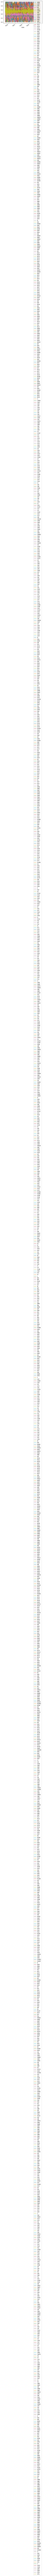

In [99]:
delta.plot()

In [101]:
import statsmodels.api as sm

In [104]:
delta_new = delta[1:-1]

In [107]:
model = sm.tsa.VAR(close_filt[:-10])

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [108]:
model_fit = model.fit(maxlags=30, trend='ct', ic='aic')

LinAlgError: 1220-th leading minor of the array is not positive definite

In [68]:
closes.index[-5:]

DatetimeIndex(['2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21',
               '2020-04-22'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [69]:
lag_order = model_fit.k_ar

forecast = pd.DataFrame(model_fit.forecast(closes[1:-5].values[-lag_order:], 5),columns=closes.columns,index=closes.index[-5:])

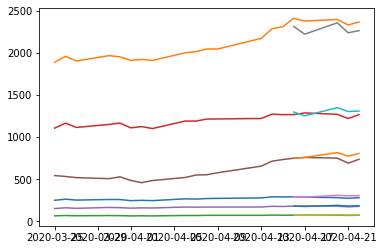

In [70]:
plt.plot(closes[-20:])
plt.plot(forecast)

In [36]:
mod = sm.tsa.VARMAX(closes[1:-10], order=(5,1))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyboardInterrupt: 

In [ ]:
pred = res.predict()

In [ ]:
import matplotlib.pyplot as plt
closes[1:-10].plot(figsize=(15,10))
pred.plot(figsize=(15,10))

In [23]:
res.forecast(5)

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,AAPL,AMZN,FTEC,GOOG,MSFT,TSLA
81,0.553417,0.875650,0.544780,0.414235,0.770340,0.646160
82,0.493938,0.875400,0.482815,0.403857,0.685923,0.547309
83,0.448975,0.862828,0.478415,0.431769,0.693245,0.588074
84,0.508683,0.863781,0.551712,0.459561,0.756244,0.635008
85,0.494059,0.825617,0.529297,0.442968,0.696361,0.584362


In [25]:
min_max_scaler.inverse_transform(res.forecast(5))

/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/craigledgerwood/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


array([[ 281.27791747, 2317.21806845,   68.76941964, 1251.33920236,
         176.06773032,  720.61417719],
       [ 275.16164454, 2317.03522362,   67.17934683, 1246.46096641,
         171.61340982,  665.63348649],
       [ 270.53809048, 2307.83734018,   67.06643792, 1259.58143649,
         171.99974522,  688.30684476],
       [ 276.67783065, 2308.53450069,   68.94728948, 1272.64591245,
         175.32393803,  714.41126234],
       [ 275.17404066, 2280.61450857,   68.3721136 , 1264.84585231,
         172.16418386,  686.24199387]])

In [27]:
min_max_scaler.data_min_

array([ 224.36999512, 1676.60998535,   54.79000092, 1056.61999512,
        135.41999817,  361.22000122])